In [150]:
import pandas as pd
import os 
import datetime as dt
import numpy as np
from math import floor
import matplotlib.pyplot as plt
import json
from modules.plotting import plot_histogram, plot_pie_chart, plot_bar

In [104]:
fp = os.path.join('data', 'results', 'DEEP_Cleaned_Survey_Responses_S1.csv')
df = pd.read_csv(fp, index_col=0)
display(df.head(3), df.shape)


display(df.columns)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,0,NaN,0,1,0,0,1,0,0,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,0,NaN,1,0,1,0,0,1,0,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,0,NaN,0,0,1,0,0,0,0,NaN


(290, 89)

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'language', 'total_time',
       'How did you learn about the survey?_Response',
       'How did you learn about the survey?_Other',
       'Are you taking this survey online or in person?_Response',
       'What zip code do you currently live in?_Open',
       'What is your date of birth?_Date',
       'Which of the following best describes you?_Response',
       'What is the highest level of education that you have attained?_Response',
       'Do you hold any professional certifications?_Response',
       'What certifications do you hold?_Open',
       'Are you currently employed?_Response',
       'How many jobs do you currently work at?_Response',
       'What are your current job title(s)_Open',
       'Does your current compensation cover what you need to feel financially comfortable?_Response',
       'What would it take for you to feel like you were earning enough to feel financially comforta

Geographic Information (Zip Code)

In [80]:
## WIP: Figure out whether we want to plot by zip code or county 
### Assign zip code to counties -- zipcodes can sometimes overlap multiple counties
### Assign zip codes to wilmington -- can, from google list
### Write mapping function for zip code plots 

import pygris 

pygris_de_zip_2010 = pygris.zctas(state='DE', year=2010)[['ZCTA5CE10','geometry']]\
    .rename({'ZCTA5CE10':'zip_code'}, axis=1)


wilm_zips = [ # from Google results 
    19801,
    19802,
    19803,
    19804,
    19805,
    19806,
    19807,
    19808,
    19809,
    19810,
    19850,
    19880,
    19899
    ]
wilm_zips = [str(x) for x in wilm_zips]

pygris_de_zip_2010['in_wilmington'] = pygris_de_zip_2010['zip_code'].apply(lambda x: x in wilm_zips)
display(pygris_de_zip_2010)

Using FIPS code '10' for input 'DE'


,zip_code,geometry,in_wilmington
0,19962,"POLYGON ((-75.53140 39.05378, -75.53236 39.053...",False
1,19936,"POLYGON ((-75.58837 39.22189, -75.58813 39.222...",False
2,19720,"POLYGON ((-75.62946 39.68495, -75.62930 39.685...",False
3,19806,"POLYGON ((-75.55876 39.74726, -75.55898 39.747...",True
4,19804,"POLYGON ((-75.57044 39.72937, -75.56955 39.730...",True
...,...,...,...
63,19733,"POLYGON ((-75.65278 39.55704, -75.65281 39.557...",False
64,19945,"MULTIPOLYGON (((-75.08347 38.52856, -75.08367 ...",False
65,19971,"POLYGON ((-75.13496 38.69166, -75.13525 38.692...",False
66,19975,"MULTIPOLYGON (((-75.17075 38.49657, -75.17096 ...",False


In [167]:
zip_code_q = 'What zip code do you currently live in?_Open'

# Zip code errors 
zip_all_missing = list(df[~df[zip_code_q].isin(pygris_de_zip_2010['zip_code'])][zip_code_q].unique())
print('All Missing Zipcodes:\n', zip_all_missing, '\n')

# Attempting to fix zipcodes of wrong length
df[zip_code_q] = df[zip_code_q].astype(str).str.rstrip('.0')
zip_wrong_length = list(df[df[zip_code_q].str.len() != 5][zip_code_q].unique())
print('Zipcodes of Wrong Length:\n', zip_wrong_length, '\n')

print('Tentative matches to wrong length zips:')
display(pygris_de_zip_2010[pygris_de_zip_2010['zip_code'].str.contains('|'.join(zip_wrong_length), regex=True)].sort_values('zip_code'))

display(pygris_de_zip_2010[pygris_de_zip_2010['zip_code'] == '19802'])

zip_corrections = {
    '1972':'19720',
    '1981':'19810',
    '1912':'21912',
    '1980201101':'19802', 
    '1995':np.nan, # ambiguous -- we know they're in sussex county 
    'nan':np.nan
}   

df['zip_corrected'] = df[zip_code_q].apply(lambda x: zip_corrections[x] if x in zip_corrections.keys() else x)
print(f'Assigned new values to:  {list(zip_corrections.keys())}\n')

zip_still_missing = list(df[df['zip_corrected'].isin(zip_all_missing)]['zip_corrected'])
print('Zips still missing: ', zip_still_missing)
print("At least For now, assigning these to 'NaN'.\n")

for z in zip_still_missing: 
    zip_corrections[z] = np.nan

print("Final Map of Corrected Zipcodes:\n", json.dumps(zip_corrections, indent=3))
df['zip_corrected'] = df[zip_code_q].apply(lambda x: zip_corrections[x] if x in zip_corrections.keys() else x)

All Missing Zipcodes:
 ['1972', '1912', '19142', '19072', '1981', 'nan', '29962', '19905', '21921', '1980201101', '94521', '19863', '1995'] 

Zipcodes of Wrong Length:
 ['1972', '1912', '1981', 'nan', '1980201101', '1995'] 

Tentative matches to wrong length zips:


,zip_code,geometry,in_wilmington
2,19720,"POLYGON ((-75.62946 39.68495, -75.62930 39.685...",False
55,19810,"POLYGON ((-75.53482 39.83059, -75.53490 39.830...",True
16,19950,"POLYGON ((-75.59376 38.78900, -75.59375 38.788...",False
36,19951,"MULTIPOLYGON (((-75.25256 38.65946, -75.25244 ...",False
52,19952,"MULTIPOLYGON (((-75.59099 38.96245, -75.59059 ...",False
48,19953,"POLYGON ((-75.73669 39.12791, -75.73723 39.128...",False
24,19954,"POLYGON ((-75.49256 38.92015, -75.49153 38.920...",False
60,19955,"POLYGON ((-75.66702 39.22741, -75.66703 39.227...",False
35,19956,"POLYGON ((-75.50310 38.61021, -75.50098 38.610...",False
22,19958,"MULTIPOLYGON (((-75.13078 38.73664, -75.13056 ...",False


,zip_code,geometry,in_wilmington
61,19802,"POLYGON ((-75.54262 39.76466, -75.54256 39.764...",True


Assigned new values to:  ['1972', '1981', '1912', '1980201101', '1995', 'nan']

Zips still missing:  ['19142', '19072', '29962', '19905', '21921', '94521', '19863']
At least For now, assigning these to 'NaN'.

Final Map of Corrected Zipcodes:
 {
   "1972": "19720",
   "1981": "19810",
   "1912": "21912",
   "1980201101": "19802",
   "1995": NaN,
   "nan": NaN,
   "19142": NaN,
   "19072": NaN,
   "29962": NaN,
   "19905": NaN,
   "21921": NaN,
   "94521": NaN,
   "19863": NaN
}


When we join df to the geometries now, only zipcodes with np.nan in `zip_corrected` should be missing geometries.

In [168]:
df2 = df.merge(pygris_de_zip_2010, how='outer', left_on='zip_corrected', right_on='zip_code', indicator=True)
df2[df2['_merge'] != 'both'][['Respondent ID',zip_code_q,'zip_corrected','zip_code', 'geometry', 'in_wilmington', '_merge']]

,Respondent ID,What zip code do you currently live in?_Open,zip_corrected,zip_code,geometry,in_wilmington,_merge
180,1.185115e+11,19142,NaN,NaN,None,NaN,left_only
181,1.184963e+11,19072,NaN,NaN,None,NaN,left_only
182,1.184727e+11,nan,NaN,NaN,None,NaN,left_only
183,1.184721e+11,29962,NaN,NaN,None,NaN,left_only
184,1.184679e+11,nan,NaN,NaN,None,NaN,left_only
185,1.184679e+11,nan,NaN,NaN,None,NaN,left_only
186,1.184679e+11,19905,NaN,NaN,None,NaN,left_only
187,1.184662e+11,21921,NaN,NaN,None,NaN,left_only
188,1.184262e+11,nan,NaN,NaN,None,NaN,left_only
189,1.184214e+11,94521,NaN,NaN,None,NaN,left_only


In [82]:
# TBD: Mapping zip codes to city/county 
url = "https://www.zip-codes.com/state/de.asp"
de_zip_other = pd.read_html(url)
de_zip_other[0]

zip_code_city_county_csv = """zip_code,city,county
19701,	Bear,	New Castle	
19702,	Newark,	New Castle	
19703,	Claymont,	New Castle	
19706,	Delaware City,	New Castle	
19707,	Hockessin,	New Castle	
19708,	Kirkwood,	New Castle	
19709,	Middletown,	New Castle	
19710,	Montchanin,	New Castle	
19711,	Newark,	New Castle	
19712,	Newark,	New Castle	
19713,	Newark,	New Castle	
19714,	Newark,	New Castle	
19715,	Newark,	New Castle	
19716,	Newark,	New Castle	
19717,	Newark,	New Castle	
19718,	Newark,	New Castle	
19720,	New Castle,	New Castle	
19721,	New Castle,	New Castle	
19725,	Newark,	New Castle	
19726,	New Castle,	New Castle	
19730,	Odessa,	New Castle	
19731,	Port Penn,	New Castle	
19732,	Rockland,	New Castle	
19733,	Saint Georges,	New Castle	
19734,	Townsend,	New Castle	
19735,	Winterthur,	New Castle	
19736,	Yorklyn,	New Castle	
19801,	Wilmington,	New Castle	
19802,	Wilmington,	New Castle	
19803,	Wilmington,	New Castle	
19804,	Wilmington,	New Castle	
19805,	Wilmington,	New Castle	
19806,	Wilmington,	New Castle	
19807,	Wilmington,	New Castle	
19808,	Wilmington,	New Castle	
19809,	Wilmington,	New Castle	
19810,	Wilmington,	New Castle	
19850,	Wilmington,	New Castle	
19880,	Wilmington,	New Castle	
19884,	Wilmington,	New Castle	
19885,	Wilmington,	New Castle	
19886,	Wilmington,	New Castle	
19890,	Wilmington,	New Castle	
19891,	Wilmington,	New Castle	
19892,	Wilmington,	New Castle	
19893,	Wilmington,	New Castle	
19894,	Wilmington,	New Castle	
19895,	Wilmington,	New Castle	
19896,	Wilmington,	New Castle	
19897,	Wilmington,	New Castle	
19898,	Wilmington,	New Castle	
19899,	Wilmington,	New Castle	
19901,	Dover,	Kent	
19902,	Dover AFB,	Kent	
19903,	Dover,	Kent	
19904,	Dover,	Kent	
19905,	Dover,	Kent	
19906,	Dover,	Kent	
19930,	Bethany Beach,	Sussex	
19931,	Bethel,	Sussex	
19933,	Bridgeville,	Sussex	
19934,	Camden Wyoming,	Kent	
19936,	Cheswold,	Kent	
19938,	Clayton,	Kent	
19939,	Dagsboro,	Sussex	
19940,	Delmar,	Sussex	
19941,	Ellendale,	Sussex	
19943,	Felton,	Kent	
19944,	Fenwick, Island	Sussex	
19945,	Frankford,	Sussex	
19946,	Frederica,	Kent	
19947,	Georgetown,	Sussex	
19950,	Greenwood,	Sussex	
19951,	Harbeson,	Sussex	
19952,	Harrington,	Kent	
19953,	Hartly,	Kent	
19954,	Houston,	Kent	
19955,	Kenton,	Kent	
19956,	Laurel,	Sussex	
19958,	Lewes,	Sussex	
19960,	Lincoln,	Sussex	
19961,	Little Creek,	Kent	
19962,	Magnolia,	Kent	
19963,	Milford,	Sussex	
19964,	Marydel,	Kent	
19966,	Millsboro,	Sussex	
19967,	Millville,	Sussex	
19968,	Milton,	Sussex	
19969,	Nassau,	Sussex	
19970,	Ocean View,	Sussex	
19971,	Rehoboth Beach,	Sussex	
19973,	Seaford,	Sussex	
19975,	Selbyville,	Sussex	
19977,	Smyrna,	Kent	
19979,	Viola,	Kent	
19980,	Woodside,	Kent"""

,0,1
0,Our Products• US ZIP Code Database • US ZIP+4 ...,403 Forbidden \tQuestions? 1-800-425-1169 Sor...


Other Categorical Variables for Filtering 

In [70]:
### Categorical variables to filter df (some need to be added) 

## Age 
dob_q = 'What is your date of birth?_Date'
current_date = dt.datetime.utcnow().date()
current_date_ts = pd.Timestamp(current_date.year, current_date.month, current_date.day)
if df['What is your date of birth?_Date'].dtype.type == np.object_: 
    df['What is your date of birth?_Date'] = pd.to_datetime(df['What is your date of birth?_Date']) 
df['Age'] = df['What is your date of birth?_Date'].apply(lambda x: np.round((current_date_ts - x).days / 365))

## Age Bracket 
year_boundaries = list(range(10,109, 10)) # for binning respondent ages 
df['Age_bin'] = pd.cut(df['Age'], bins=year_boundaries)\
    .apply(lambda x: f"{x.left} to {x.right - 1}")

## Race 
race_q = 'Which of the following best describes you?_Response' 

## Educational Attainment (Most Specific)
edu_level_q ='What is the highest level of education that you have attained?_Response'

## Degree Status (Degree/No Degree)
degree_types = ["Bachelor's degree", "Associate's degree","Master's or higher degree"]
df['higher_ed'] = np.where(df[edu_level_q].isin(degree_types), 'Degree', 'No Degree')

## Education Level (Graduate Degree, Undergraduate or Some Undergraduate, Lower Only)
grad = ["Master's or higher degree"]
under = ["Bachelor's degree", "Associate's degree", 'Some college, no degree']
lower = ['High school diploma', 'GED', 'Some high school, no diploma', 'Currently attending high school']

grad_under_lower = {"Master's or higher degree": 'Graduate',
 "Bachelor's degree": "Undergrad",
 "Associate's degree": "Undergrad",
 'Some college, no degree': "Undergrad",
 'High school diploma': "Lower",
 'GED': "Lower",
 'Some high school, no diploma': "Lower",
 'Currently attending high school': "Lower"}

df['grad_under_lower'] = df[edu_level_q].apply(lambda x: grad_under_lower[x] if isinstance(x,str) else np.nan)

## Zip Code
zip_code_q = 'What zip code do you currently live in?_Open'

## Wilmington/Non-Wilmington
if 'in_wilmington' not in df.columns: 
    df = df.merge(de_zip[['zip_code', 'in_wilmington']], how='left', left_on=zip_code_q, right_on='zip_code')



## Employed/Unemployed 
unemployed_q = 'Are you currently employed?_Response'

## Had Training/No Training 

## Have Certifications/No Certifications 

## Job Category / Industry (Current and Ideal)
    # There are too many kinds of jobs to create and digest plots for each
    # Focus on two interest areas: entrepreneurial-focused and food/hospitality 



In [79]:
## Wilmington/Non-Wilmington

a = set(de_zip['zip_code'])
b = set(df[zip_code_q])
len(a.difference(b))
len(a)

68

In [33]:
dict.fromkeys(grad + under + lower)
{"Master's or higher degree": None,
 "Bachelor's degree": None,
 "Associate's degree": None,
 'Some college, no degree': None,
 'High school diploma': None,
 'GED': None,
 'Some high school, no diploma': None,
 'Currently attending high school': None}

{"Master's or higher degree": None,
 "Bachelor's degree": None,
 "Associate's degree": None,
 'Some college, no degree': None,
 'High school diploma': None,
 'GED': None,
 'Some high school, no diploma': None,
 'Currently attending high school': None}

## **Presentation Outline**
 
[Link](https://docs.google.com/presentation/d/1HSTv5NgdKBrXRzOEiITktw4wbaG_nAib/edit?usp=sharing&ouid=107908789910623442905&rtpof=true&sd=true)

#### **Respondent Demographics**
* Age 
* Race 
* Geography 


Erroneous or NAN DOB Entries


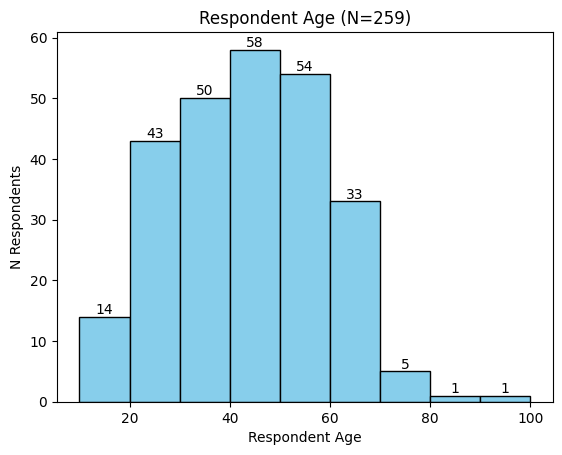

,Age Range,Count
0,40 to 49,60
1,50 to 59,55
2,30 to 39,50
3,20 to 29,46
4,60 to 69,27
5,10 to 19,15
9,70 and older,6


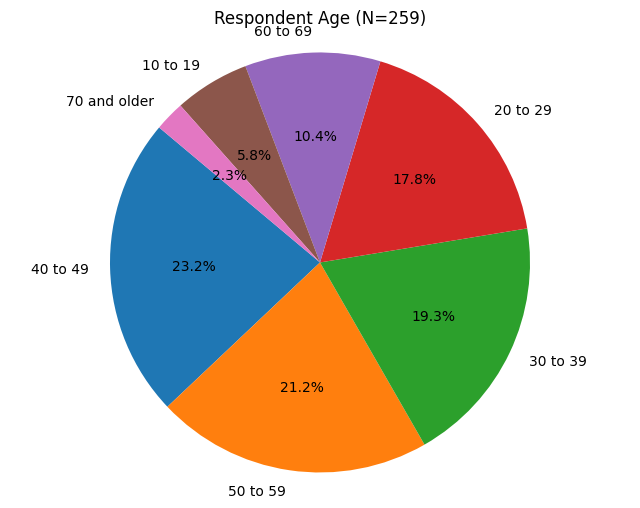

In [15]:
## Age

# cast DOB to dt and subtract from current year
dob_q = 'What is your date of birth?_Date'
current_date = dt.datetime.utcnow().date()
current_date_ts = pd.Timestamp(current_date.year, current_date.month, current_date.day)

if df['What is your date of birth?_Date'].dtype.type == np.object_: 
    df['What is your date of birth?_Date'] = pd.to_datetime(df['What is your date of birth?_Date']) 
df['Age'] = df['What is your date of birth?_Date'].apply(lambda x: np.round((current_date_ts - x).days / 365))

# fill nans and correct errors 
print('Erroneous or NAN DOB Entries')
dob_missing = df[(df['Age'] <= 1) | (df['Age'].isna())][['Respondent ID', dob_q, 'Age']]
df['Age'] = np.where(df['Respondent ID'].isin(dob_missing['Respondent ID']), np.nan, df['Age'])
# display(dob_missing, f"{dob_missing.shape[0]} errors filled with NaN")

# plot histogram 
title = f'Respondent Age (N={df[~df["Age"].isna()].shape[0]})'
year_boundaries = list(range(10,109, 10)) # for binning respondent ages 
plot_histogram(df['Age'], 
                 bins=year_boundaries, # or try 10 for decile 
                 xlabel="Respondent Age", 
                 ylabel='N Respondents',
                 edgecolor='black', 
                 title=title, 
                 bar_labels=True)

# plot pie chart 
df['Age_bin'] = pd.cut(df['Age'], bins=year_boundaries)\
    .apply(lambda x: f"{x.left} to {x.right - 1}")
v_counts = df['Age_bin'].value_counts().reset_index().rename({"Age_bin":"Age Range",'count':'Count'}, axis=1)
count_over_70 = v_counts.iloc[-3:, -1].sum()
v_counts.loc[len(v_counts.index)] = ['70 and older',count_over_70]
v_counts = v_counts[~v_counts.index.isin([6,7,8])]
display(v_counts)
plot_pie_chart(v_counts, label_column='Age Range', count_column='Count', title=title)

# Race 
# Geography 

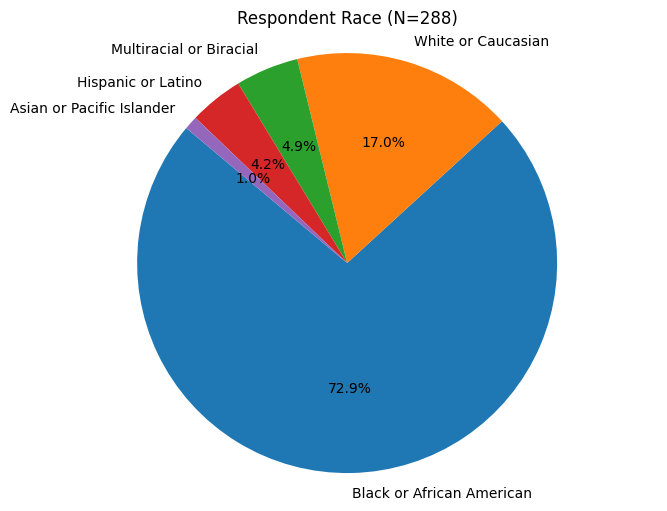

,Respondent Race,Count
0,Black or African American,210
1,White or Caucasian,49
2,Multiracial or Biracial,14
3,Hispanic or Latino,12
4,Asian or Pacific Islander,3


In [16]:
## Race 
race_q = 'Which of the following best describes you?_Response' 
title = f'Respondent Race (N={df[~df[race_q].isna()].shape[0]})'

v_counts = df[race_q].value_counts().reset_index().rename({race_q:"Respondent Race", 'count':"Count"}, axis=1)
plot_pie_chart(v_counts, label_column='Respondent Race', count_column='Count', title=title)
display(v_counts)

In [17]:
## Geography (TO-DO: Talk with Kamran)

#### **Respondent Educational History**
* Highest educational attainment 
    * By geography, race, age 
* Training Experience
    * How many participated in trainings
    * By topic 
    * Feedback 


##### Highest Educational Attainment 

In [18]:
## Highest educational attainment 

edu_level_q ='What is the highest level of education that you have attained?_Response'
unemployed_q = 'Are you currently employed?_Response'


df_college = df[['Respondent ID', edu_level_q, race_q, 'Age', 'Age_bin', unemployed_q]]
df_college_non_nan = df_college[~df_college[edu_level_q].isna()]

degree_types = ["Bachelor's degree", "Associate's degree","Master's or higher degree"]
df_college_non_nan['higher_ed'] = np.where(df_college_non_nan[edu_level_q].isin(degree_types), 'Degree', 'No Degree')
display(df_college_non_nan)

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_45755/4116661096.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_college_non_nan['higher_ed'] = np.where(df_college_non_nan[edu_level_q].isin(degree_types), 'Degree', 'No Degree')


,Respondent ID,What is the highest level of education that you have attained?_Response,Which of the following best describes you?_Response,Age,Age_bin,Are you currently employed?_Response,higher_ed
1,1.185240e+11,Bachelor's degree,Black or African American,44.0,40 to 49,Yes,Degree
2,1.185239e+11,Associate's degree,Black or African American,41.0,40 to 49,Yes,Degree
3,1.185239e+11,"Some college, no degree",White or Caucasian,39.0,30 to 39,Yes,No Degree
4,1.185234e+11,High school diploma,Black or African American,44.0,40 to 49,Yes,No Degree
5,1.185215e+11,GED,Multiracial or Biracial,35.0,30 to 39,Yes,No Degree
...,...,...,...,...,...,...,...
286,1.184166e+11,Currently attending high school,Multiracial or Biracial,16.0,10 to 19,Yes,No Degree
287,1.184166e+11,Currently attending high school,White or Caucasian,16.0,10 to 19,Yes,No Degree
288,1.184166e+11,Currently attending high school,White or Caucasian,18.0,10 to 19,No,No Degree
289,1.184164e+11,Master's or higher degree,Black or African American,35.0,30 to 39,Yes,Degree


All Respondents 

What is the highest level of education that you have attained? (N=288)


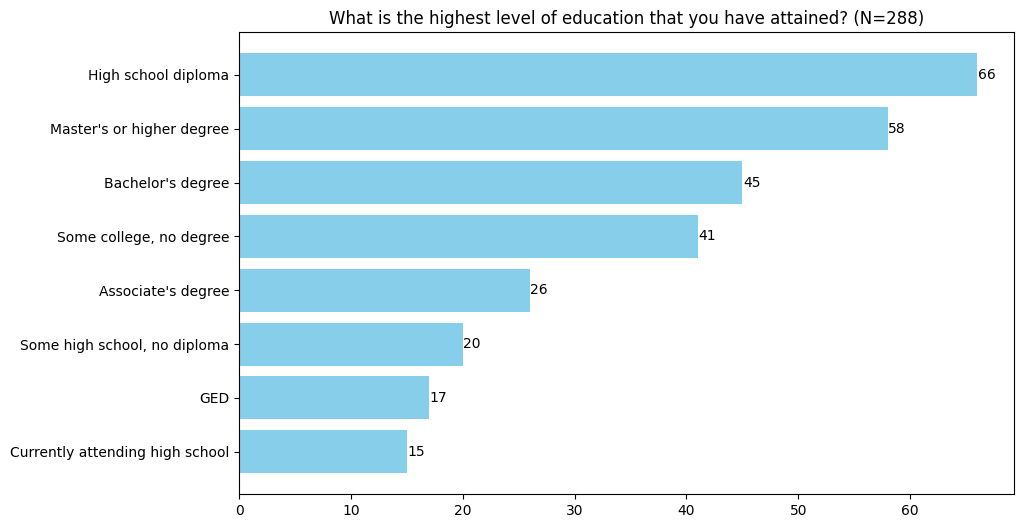

Count Column: 288


,What Is The Highest Level Of Education That You Have Attained? Response,Count
1,High school diploma,66
2,Master's or higher degree,58
3,Bachelor's degree,45
4,"Some college, no degree",41
5,Associate's degree,26
6,"Some high school, no diploma",20
7,GED,17
8,Currently attending high school,15


288


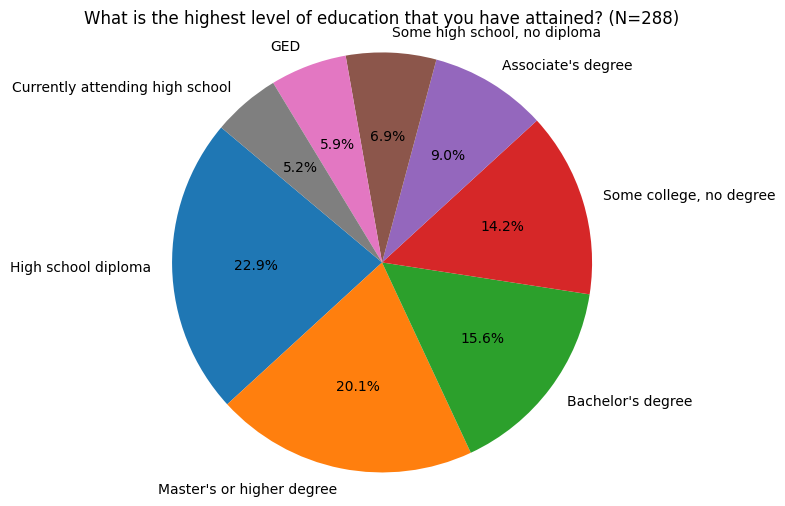

In [19]:
## By specific Education Level, All Respondents
# Bar Chart 
df_respondent_by_edu_level_counts = df_college_non_nan[edu_level_q].value_counts()

title = edu_level_q.rstrip('_Response') +f" (N={df_college_non_nan.shape[0]})"
print(title)

plot_bar(df_respondent_by_edu_level_counts, title=title) 

# pie chart 
df_respondent_by_edu_level_counts = df_respondent_by_edu_level_counts.reset_index()
total = df_respondent_by_edu_level_counts['count'].sum()
print(total)
df_respondent_by_edu_level_counts['pct'] = df_respondent_by_edu_level_counts['count'].apply(lambda x: np.round(x / total, 2))

v_counts = df_respondent_by_edu_level_counts.rename({edu_level_q:'Education Level', 
                                          'count':'Count'}, axis=1)
plot_pie_chart(v_counts, label_column='Education Level', count_column='Count', title=title)

By Race

In [20]:
## Stacked bar chart, grouped by race

{"Bachelor's degree": '#8dd3c7',
 "Associate's degree": '#ffffb3',
 'Some college, no degree': '#bebada',
 'High school diploma': '#fb8072',
 'GED': '#80b1d3',
 "Master's or higher degree": '#fdb462',
 'Some high school, no diploma': '#b3de69',
 'Currently attending high school': '#fccde5'}

,Education Level,count
0,High school diploma,59
1,Master's or higher degree,42
2,Bachelor's degree,30
3,"Some college, no degree",29
4,Associate's degree,18
5,"Some high school, no diploma",18
6,GED,12
7,Currently attending high school,2


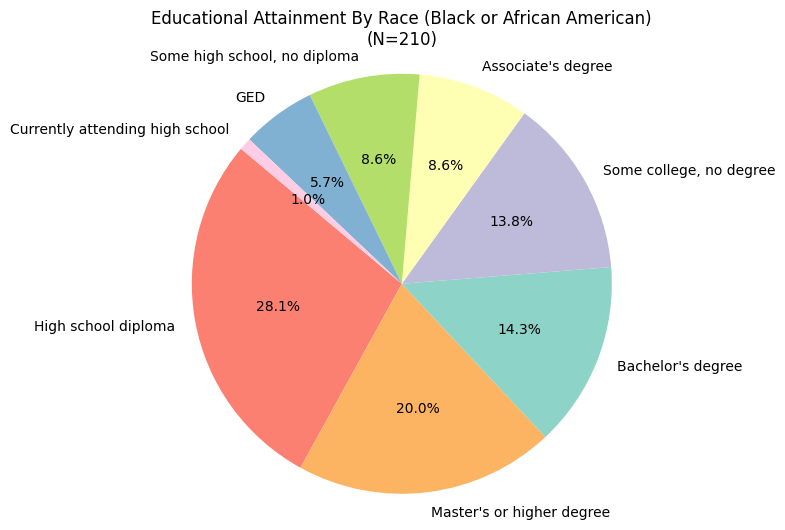

,Education Level,count
0,Master's or higher degree,13
1,Bachelor's degree,11
2,Currently attending high school,11
3,"Some college, no degree",7
4,Associate's degree,4
5,GED,2
6,High school diploma,1


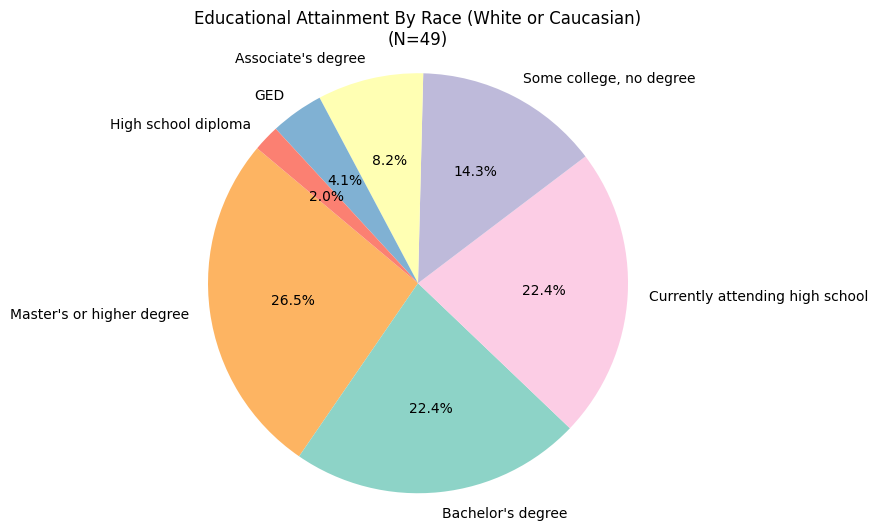

In [21]:
## Separate pie charts by race
# Specific education level
df_edu_race = df_college_non_nan[~df_college_non_nan[race_q].isna()]

edu_levels = df_edu_race[edu_level_q].()

color_palette = [
'#8dd3c7',
'#ffffb3',
'#bebada',
'#fb8072',
'#80b1d3',
'#fdb462',
'#b3de69',
'#fccde5']

color_map = dict(zip(edu_levels, color_palette))
display(color_map)

for race in ('Black or African American', 'White or Caucasian'):
    data = df_edu_race[df_edu_race[race_q] == race]
    v_counts = data[edu_level_q].value_counts().reset_index().rename({edu_level_q:'Education Level'}, axis=1)
    display(v_counts)
    title = f"Educational Attainment By Race ({race})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Education Level', count_column='count', title=title, color_map=color_map)


,Degree Status,count
0,No Degree,120
1,Degree,90


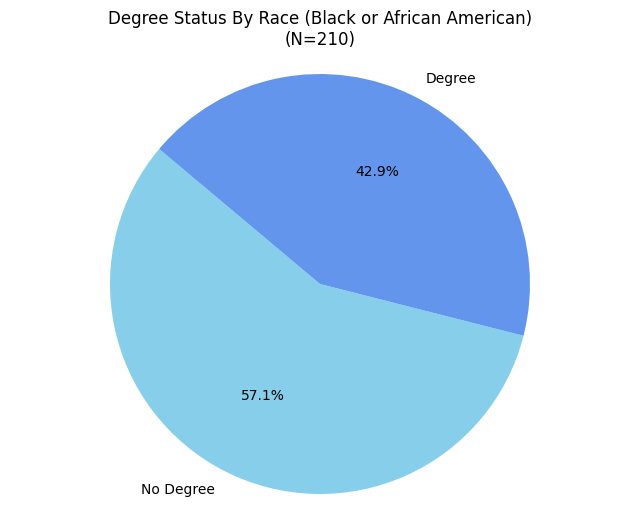

,Degree Status,count
0,Degree,28
1,No Degree,21


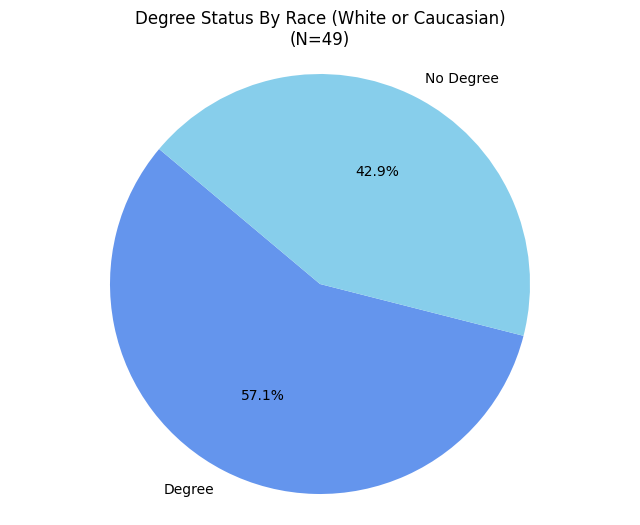

In [22]:
# Degree status 
color_map={'No Degree':'skyblue', 'Degree':'cornflowerblue'}
for race in ('Black or African American', 'White or Caucasian'):
    data = df_edu_race[df_edu_race[race_q] == race]
    v_counts = data['higher_ed'].value_counts().reset_index().rename({'higher_ed':'Degree Status'}, axis=1)
    display(v_counts)
    title = f"Degree Status By Race ({race})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Degree Status', count_column='count', title=title, color_map=color_map, legend=False, hide_labels=False)


By Age 

In [23]:
print(color_map)

{'No Degree': 'skyblue', 'Degree': 'cornflowerblue'}


{"Bachelor's degree": '#8dd3c7',
 "Associate's degree": '#ffffb3',
 'Some college, no degree': '#bebada',
 'High school diploma': '#fb8072',
 'GED': '#80b1d3',
 "Master's or higher degree": '#fdb462',
 'Some high school, no diploma': '#b3de69',
 'Currently attending high school': '#fccde5'}

,Education Level,count
0,High school diploma,14
1,Master's or higher degree,14
2,Bachelor's degree,11
3,"Some college, no degree",9
4,Associate's degree,6
5,GED,4
6,"Some high school, no diploma",2


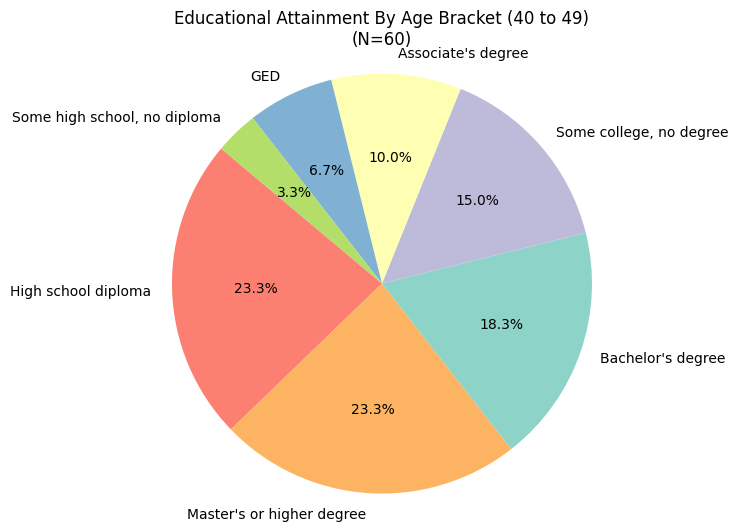

,Education Level,count
0,High school diploma,12
1,Master's or higher degree,11
2,Bachelor's degree,8
3,"Some high school, no diploma",6
4,"Some college, no degree",5
5,GED,5
6,Associate's degree,3


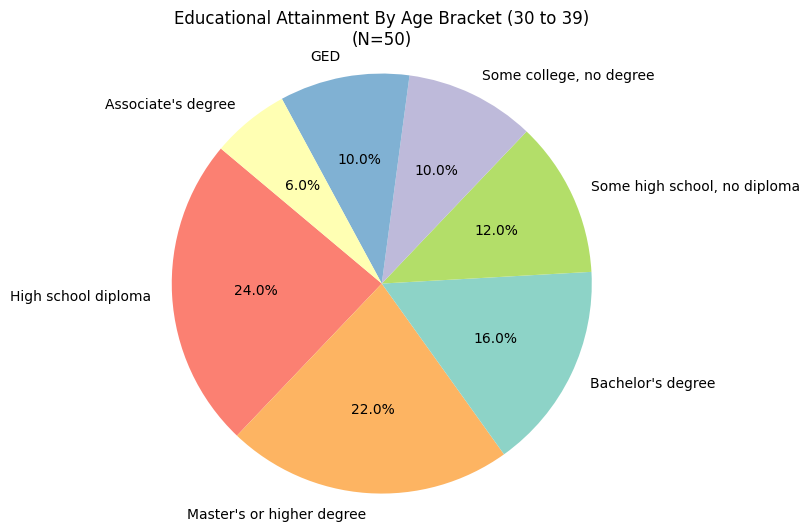

,Education Level,count


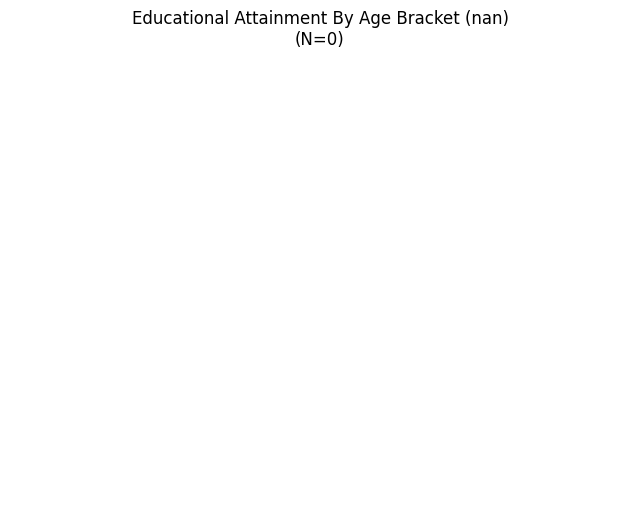

,Education Level,count
0,Master's or higher degree,11
1,Bachelor's degree,4
2,"Some high school, no diploma",4
3,"Some college, no degree",3
4,High school diploma,2
5,Associate's degree,2
6,GED,1


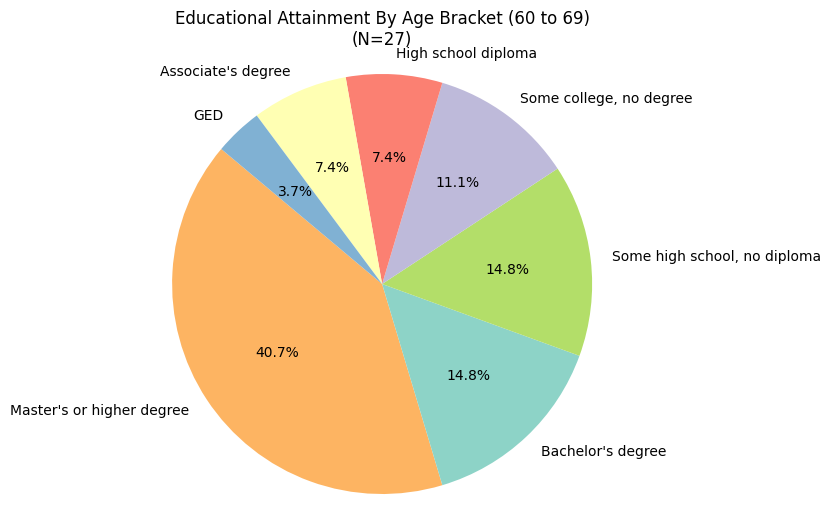

,Education Level,count
0,Master's or higher degree,15
1,Bachelor's degree,11
2,High school diploma,10
3,Associate's degree,7
4,"Some college, no degree",7
5,GED,3
6,"Some high school, no diploma",2


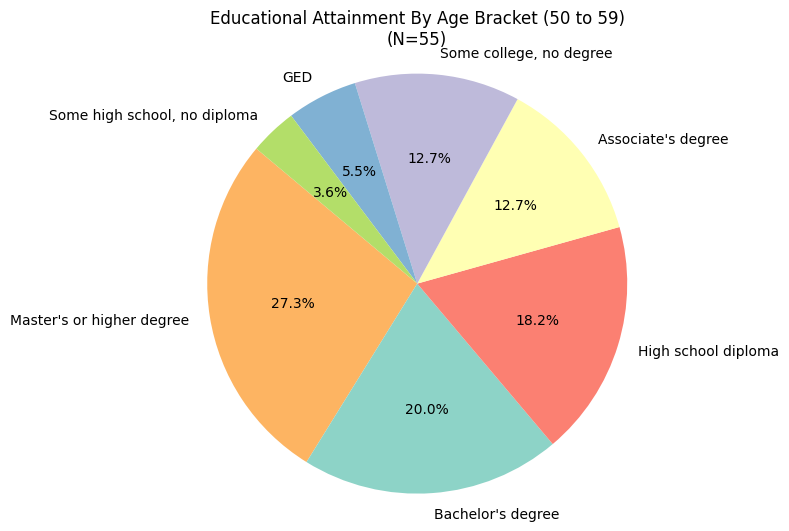

,Education Level,count
0,Bachelor's degree,1


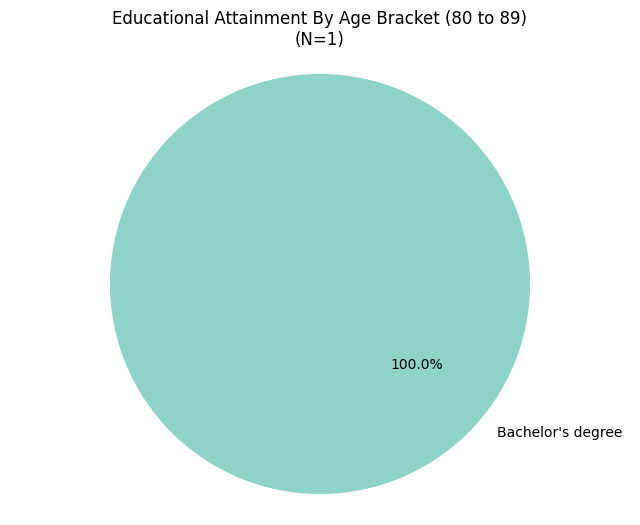

,Education Level,count
0,High school diploma,22
1,"Some college, no degree",8
2,"Some high school, no diploma",5
3,Bachelor's degree,5
4,Associate's degree,2
5,Currently attending high school,1
6,Master's or higher degree,1
7,GED,1


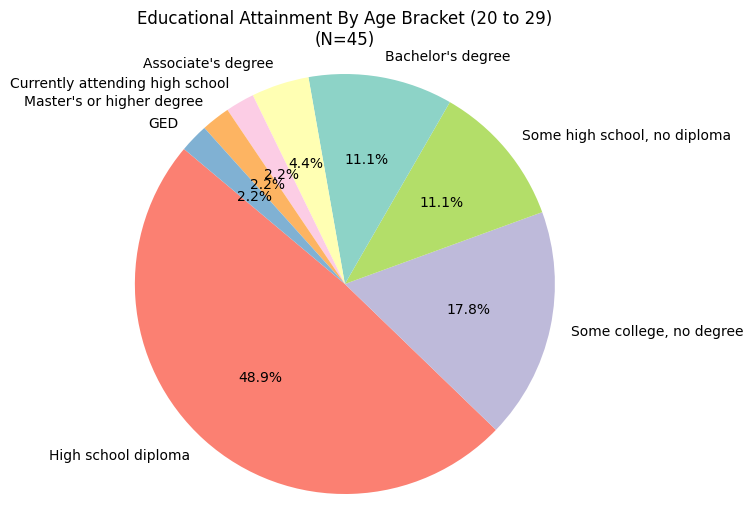

,Education Level,count
0,Bachelor's degree,2
1,Associate's degree,1
2,"Some college, no degree",1


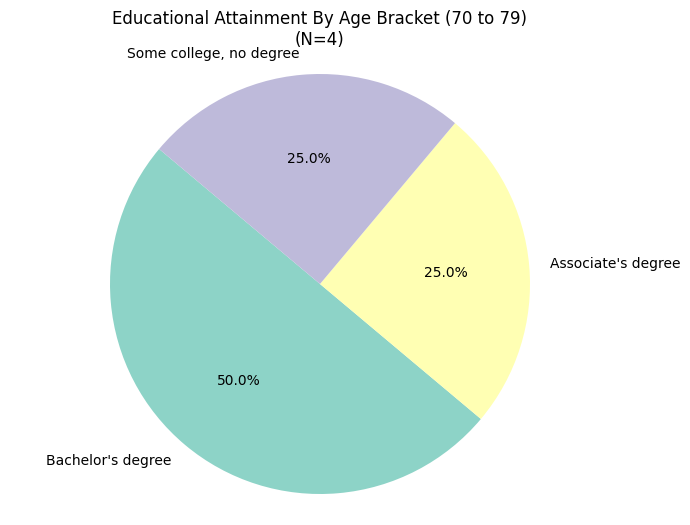

,Education Level,count
0,Currently attending high school,13
1,GED,1
2,"Some high school, no diploma",1


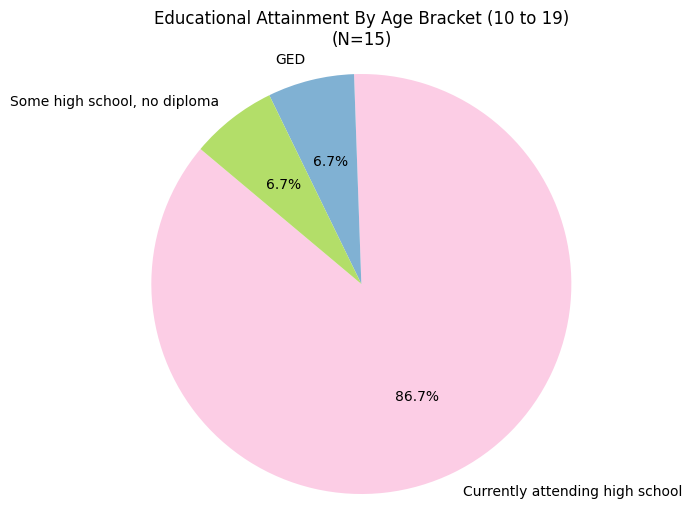

,Education Level,count
0,"Some college, no degree",1


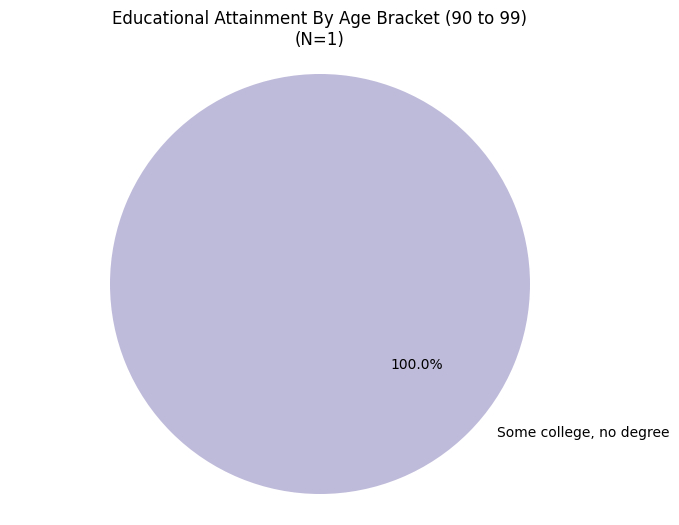

In [24]:
## Pie Charts
# Specific education level 
edu_levels = df_edu_race[edu_level_q].()

color_palette = [
'#8dd3c7',
'#ffffb3',
'#bebada',
'#fb8072',
'#80b1d3',
'#fdb462',
'#b3de69',
'#fccde5']

color_map = dict(zip(edu_levels, color_palette))
display(color_map)

for age_bracket in df_edu_race['Age_bin'].():

    data = df_college_non_nan[(df_college_non_nan['Age_bin'] == age_bracket)]
    v_counts = data[edu_level_q].value_counts().reset_index().rename({edu_level_q:'Education Level'}, axis=1)
    display(v_counts)
    title = f"Educational Attainment By Age Bracket ({age_bracket})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Education Level', count_column='count', title=title, color_map=color_map)


,Education Level,count
0,Degree,31
1,No Degree,29


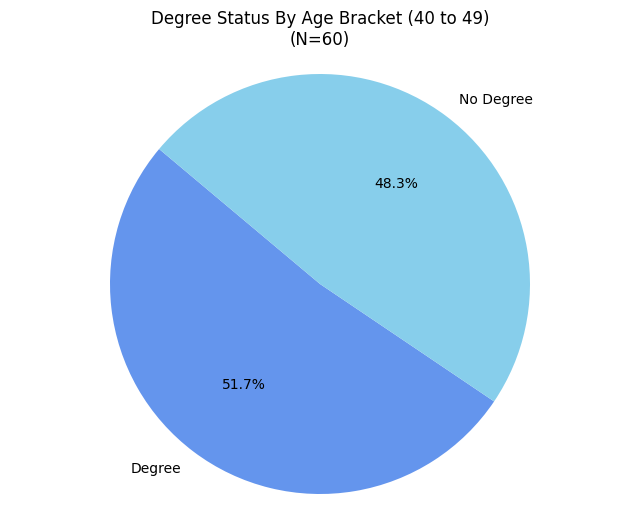

,Education Level,count
0,No Degree,28
1,Degree,22


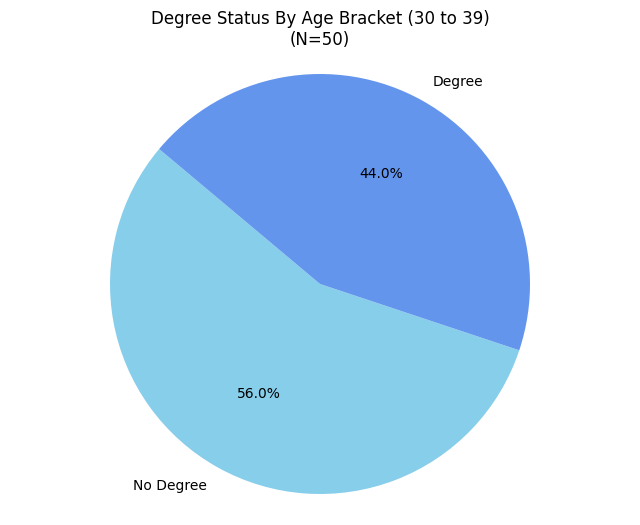

,Education Level,count


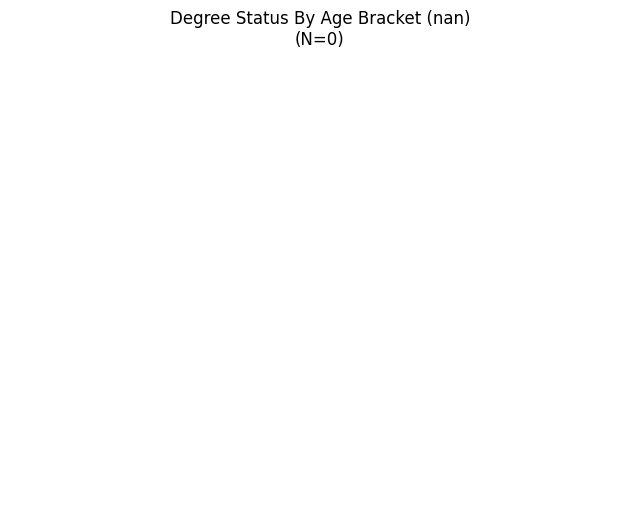

,Education Level,count
0,Degree,17
1,No Degree,10


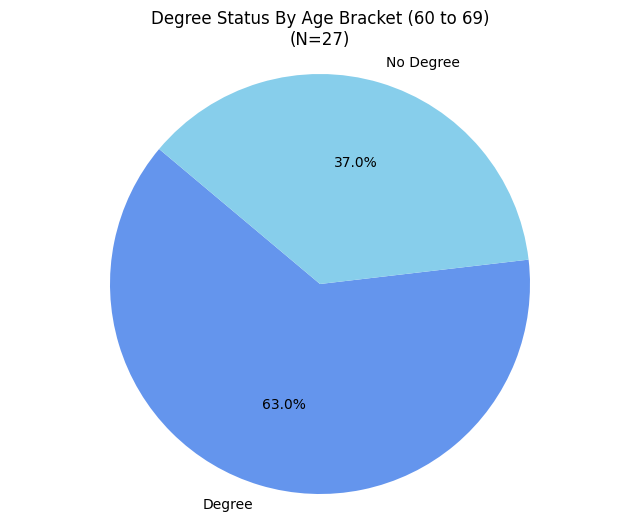

,Education Level,count
0,Degree,33
1,No Degree,22


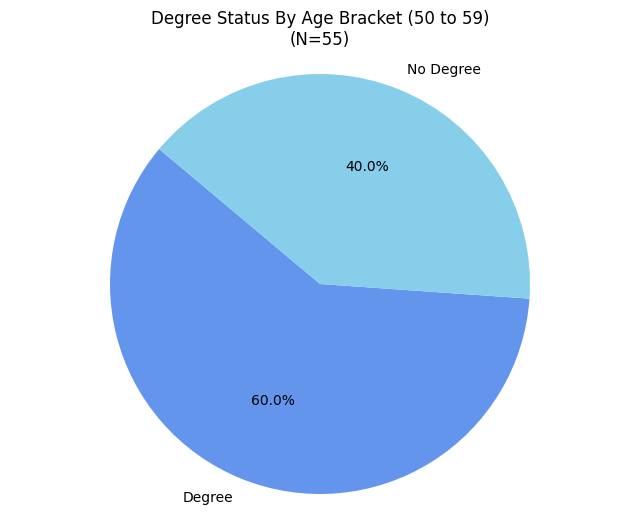

,Education Level,count
0,Degree,1


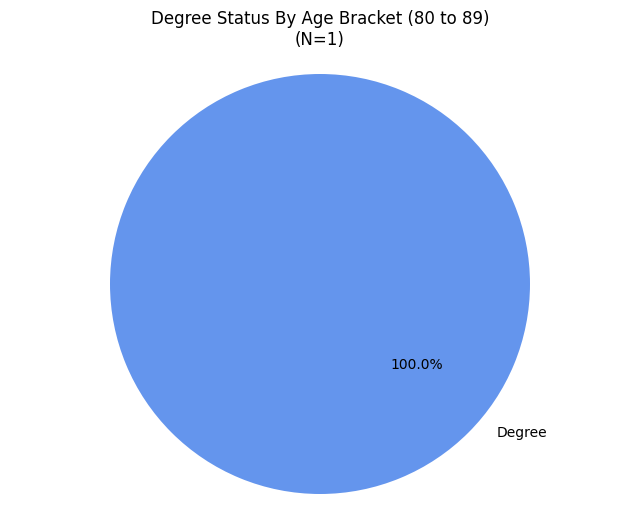

,Education Level,count
0,No Degree,37
1,Degree,8


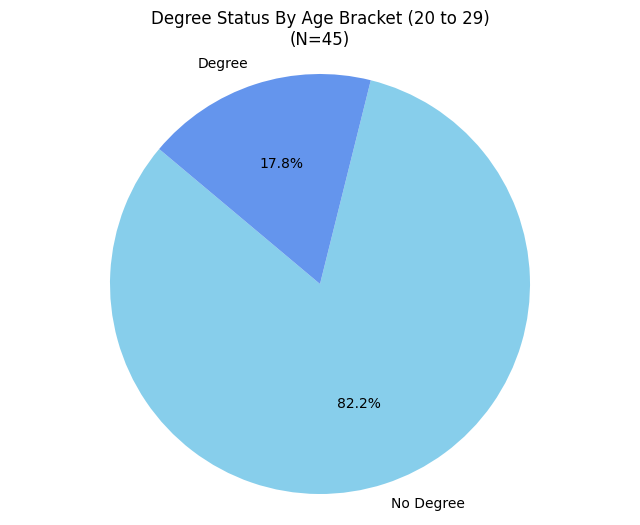

,Education Level,count
0,Degree,3
1,No Degree,1


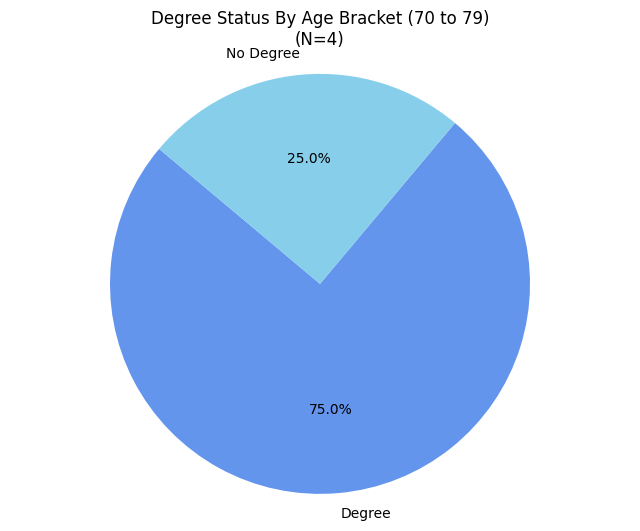

,Education Level,count
0,No Degree,15


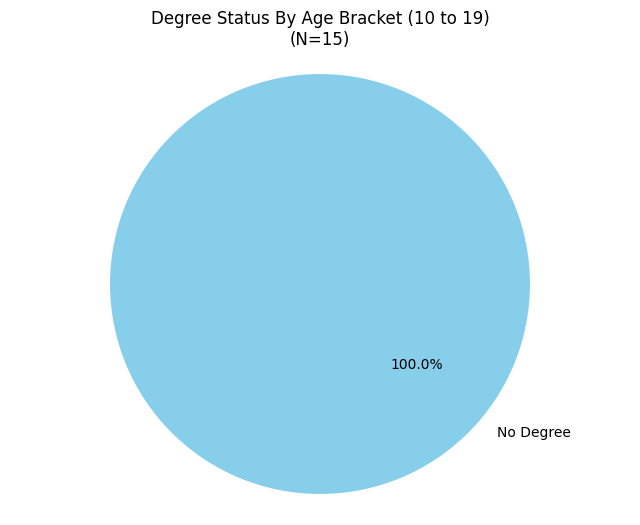

,Education Level,count
0,No Degree,1


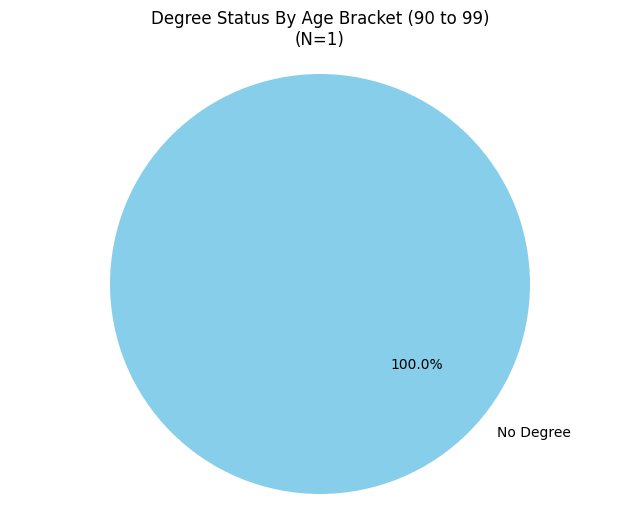

In [25]:
# Degree Status
color_map = {"No Degree":"skyblue", "Degree":"cornflowerblue"}

for age_bracket in df_edu_race['Age_bin'].():
    data = df_college_non_nan[(df_college_non_nan['Age_bin'] == age_bracket)]
    v_counts = data['higher_ed'].value_counts().reset_index().rename({'higher_ed':'Education Level'}, axis=1)
    display(v_counts)
    title = f"Degree Status By Age Bracket ({age_bracket})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Education Level', count_column='count', title=title, color_map=color_map)


##### Training Status 
* How many participated in trainings
* By topic 
* Feedback 
* By geography, educational attainment, current job 


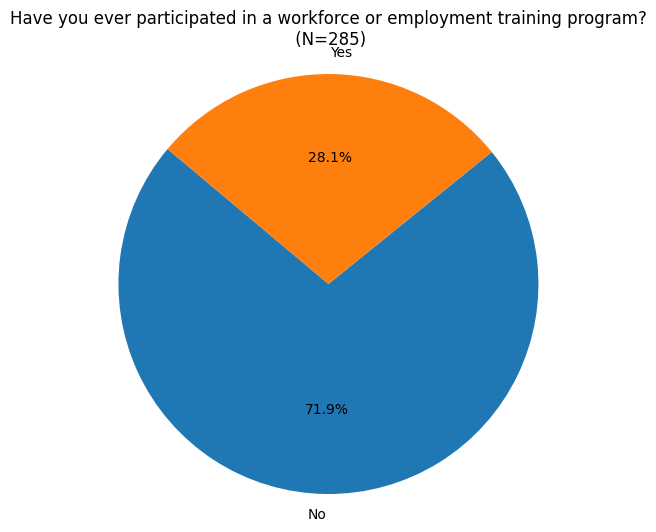

,Attended Training,count
0,No,205
1,Yes,80


In [26]:
past_training_q = 'Have you ever participated in a workforce or employment training program?_Response'
v_counts = df[past_training_q].value_counts().reset_index().rename({past_training_q:'Attended Training'}, axis=1)
n_training_non_nan = v_counts['count'].sum()

title = past_training_q.rstrip('_Response') +f"\n (N={n_training_non_nan})"


plot_pie_chart(v_counts, title=title, label_column='Attended Training', count_column='count')
display(v_counts)

In [28]:
df[['Respondent ID', past_training_q, edu_level_q, 'higher_ed', 'Age', 'Age_bin', unemployed_q]]

KeyError: "['higher_ed'] not in index"

#### **Respondent Employment Status**

* Current status (employed/unemployed)
    * By geography, age, educational attainment 
* Job Type 
    * By geography, age, educational attainment
    

##### Employment Status (Employed/Unemployed)


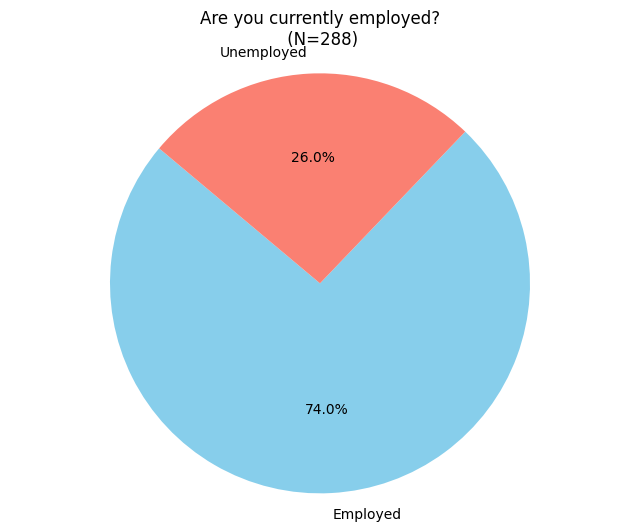

,Employment Status,count
0,Employed,213
1,Unemployed,75


In [97]:
v_counts = df[unemployed_q].value_counts().reset_index().rename({unemployed_q:'Employment Status'}, axis=1)
v_counts['Employment Status'] = np.where(v_counts['Employment Status'] == 'Yes', 'Employed', 'Unemployed')
title = unemployed_q.rstrip('_Response') +f"\n (N={v_counts['count'].sum()})"

color_map = {'Employed':'skyblue', "Unemployed":'salmon'}
plot_pie_chart(v_counts, label_column='Employment Status', count_column='count', title=title, color_map=color_map)
display(v_counts)

In [ ]:
## Pie Charts of employment status 
# Specific education level 

for edu_level in df_college_non_nan[edu_level_q].():

    data = df_college_non_nan[(df_college_non_nan[edu_level_q] == edu_level)]
    v_counts = data[unemployed_q].value_counts().reset_index().rename({unemployed_q:'Employment Status'}, axis=1)
    v_counts['Employment Status'] = np.where(v_counts['Employment Status'] == 'Yes', 'Employed', 'Unemployed')
    display(v_counts)
    title = f"Employment Status ({edu_level})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Employment Status', count_column='count', title=title, color_map=color_map)


In [ ]:
# Degree Status
for deg_status in df_college_non_nan['higher_ed'].():

    data = df_college_non_nan[(df_college_non_nan['higher_ed'] == deg_status)]
    v_counts = data[unemployed_q].value_counts().reset_index().rename({unemployed_q:'Employment Status'}, axis=1)
    v_counts['Employment Status'] = np.where(v_counts['Employment Status'] == 'Yes', 'Employed', 'Unemployed')
    display(v_counts)
    title = f"Employment Status ({deg_status})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Employment Status', count_column='count', title=title, color_map=color_map)

In [ ]:
## Pie Charts of employment status 
# By Age 
for age_bracket in df_college_non_nan['Age_bin'].():

    data = df_college_non_nan[(df_college_non_nan['Age_bin'] == age_bracket)]
    v_counts = data[unemployed_q].value_counts().reset_index().rename({unemployed_q:'Employment Status'}, axis=1)
    v_counts['Employment Status'] = np.where(v_counts['Employment Status'] == 'Yes', 'Employed', 'Unemployed')
    display(v_counts)
    title = f"Employment Status ({age_bracket})\n(N={data.shape[0]})"
    plot_pie_chart(v_counts, label_column='Employment Status', count_column='count', title=title, color_map=color_map)


##### Job Type


#### **Respondent Employment History**

* By geography 
* By type of job 

#### **Respondent Training Experience**

* By geography 
* By educational attainment 
* By current job 

#### **Respondent Unemployment Benefits**

* Reasons for not applying (people currently unemployed)


#### **Job Search Tools and Trends**

* trends by ideal job type

#### **Respondent Ideal Employment**

* By education 
* By training experience 
* By training desire 
* By current job type 

#### **Respondent Barriers to Employment**
* by education 
* by geography 
* by ideal job type 


#### **Skills Area Strengths**
* by education
* by ideal job 
* by training experience
* by training desires 


#### **Skills Area Gaps**
* by education
* by ideal job 
* by training experience
* by training desires 
